In [97]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from tqdm import *
from plot import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First initialize the plotting module and check for any missing files.

In [137]:
plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0_inj10_dm5///',
                    elephant=True, 
                    nmc=1, 
                    halos_ran=400, 
                    halos_to_keep=400,
                    data_type="mc",
                    TS100=3, #5,
                    TS1000=5, #9,
                    TSabove=9, #16,
                    xsecslim=10, #10,
                    elephantm = [0,11,52])

In [138]:
imc_missing, iobj_missing = plot_mc.files_exist()


0 files missing!


Run to get the limits.

In [117]:
mc_ary = plot_mc.return_limits()

## Elephants

Plot some elephants.

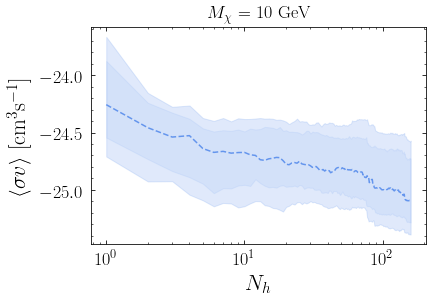

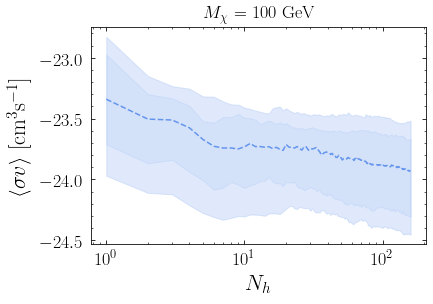

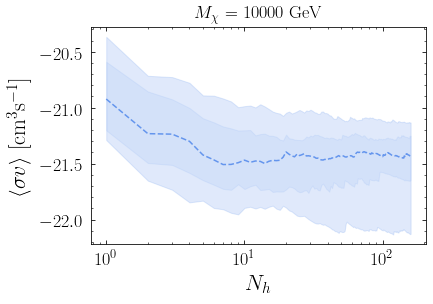

In [118]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[50],axis=1)[0], color='cornflowerblue', ls='--')

    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[16],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[84],axis=1)[0], alpha=0.1, color='cornflowerblue')
    plt.fill_between(np.arange(len(mc_ary[0][:,midx,:])) + 1,np.percentile(mc_ary[0][:,midx,:],[2.5],axis=1)[0],np.percentile(mc_ary[0][:,midx,:],[97.5],axis=1)[0], alpha=0.2, color='cornflowerblue')

    plt.title("$M_\chi$ = " + str(int(plot_mc.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$")
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
    
    plt.xscale("log")
    plt.show()

# MC Limit

In [ ]:
# mc_ary, _ = plot_mc.return_limits()
# plt.plot(plot_mc.marr,mc_ary[-1,:,0], color='firebrick', label="MC")
# plt.axhline(np.log10(3e-26), ls = '--', color='grey')
# plt.xscale("log")
# plt.xlim(10,10000)
# plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
# plt.xlabel("$m_\chi$")

# plt.legend()

# Data

In [94]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_nodmbin7_sid/',
                    elephant=False, 
                    nmc=1, 
                    halos_ran=1000, 
                    halos_to_keep=1000,
                    data_type="data",
                      nonoverlap=True,
                      nonoverlapradius=2,
                     bcut=30)
data_ary, _ = plot_data.return_limits()

## Limit

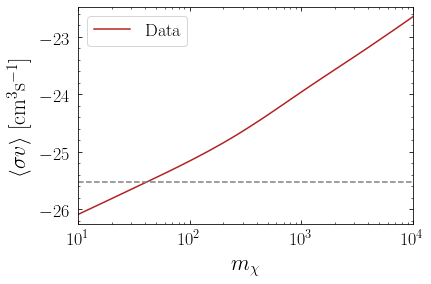

In [95]:
plt.plot(plot_data.marr,data_ary[-1,:,0], color='firebrick', label="Data")

plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]")
plt.xlabel("$m_\chi$")

plt.legend()

## Elephants

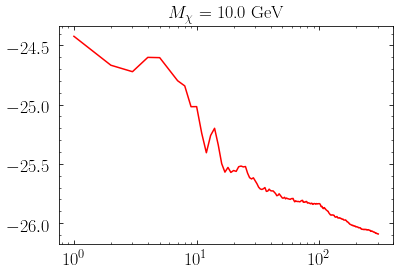

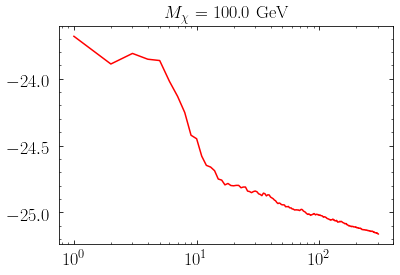

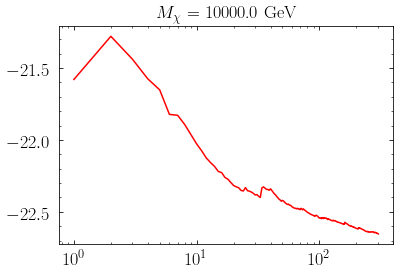

In [96]:
for midx in [0,11,52]:
    plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='red')

    plt.title("$M_\chi$ = " + str(plot_data.marr[midx]) + " GeV")
    plt.legend()
    plt.xscale("log")
    plt.show()

# Injected signal

In [2]:
nmc = 10

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/FloatPS_indiv_floatDM_nodmless7_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=150, 
                        halos_to_keep=150,
                        data_type="mc",
                        elephantm = [0])
    limit_ary_temp, xsec_max_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,11,:]
    limit_ary[idm] = limit_ary_temp[-1,11,:]

../plot.py:180: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if ((TSmx[0] > TSlim) & (TSmx[2] > self.xsecslim*best_lim[TSmx[1]])):


In [3]:
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


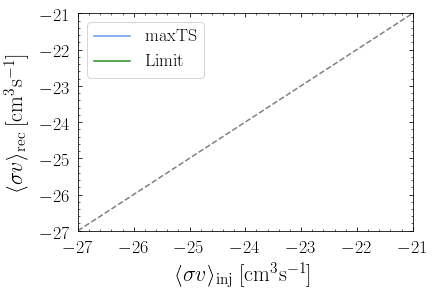

In [4]:
plt.plot(np.arange(-22,-27,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-22,-27,-1),  xsec_max[0], xsec_max[2], alpha=0.2)

plt.plot(np.arange(-22,-27,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-22,-27,-1),  lims[0], lims[2], alpha=0.2)

plt.plot([-27,-21],[-27,-21],ls='--', color='grey')

# plt.axvspan(limit_nodm[0],limit_nodm[2],color='firebrick',alpha=0.2)
# plt.axvline(limit_nodm[1],color='firebrick',alpha=1,ls='--', label="null Limit")


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")

plt.ylim(-27,-21)
plt.xlim(-27,-21)


plt.legend()

In [6]:
print xsec_max[1]
print xsec_max_ary

[-inf -inf -inf -inf -inf]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# xsec LLs

5it [00:01,  3.02it/s]


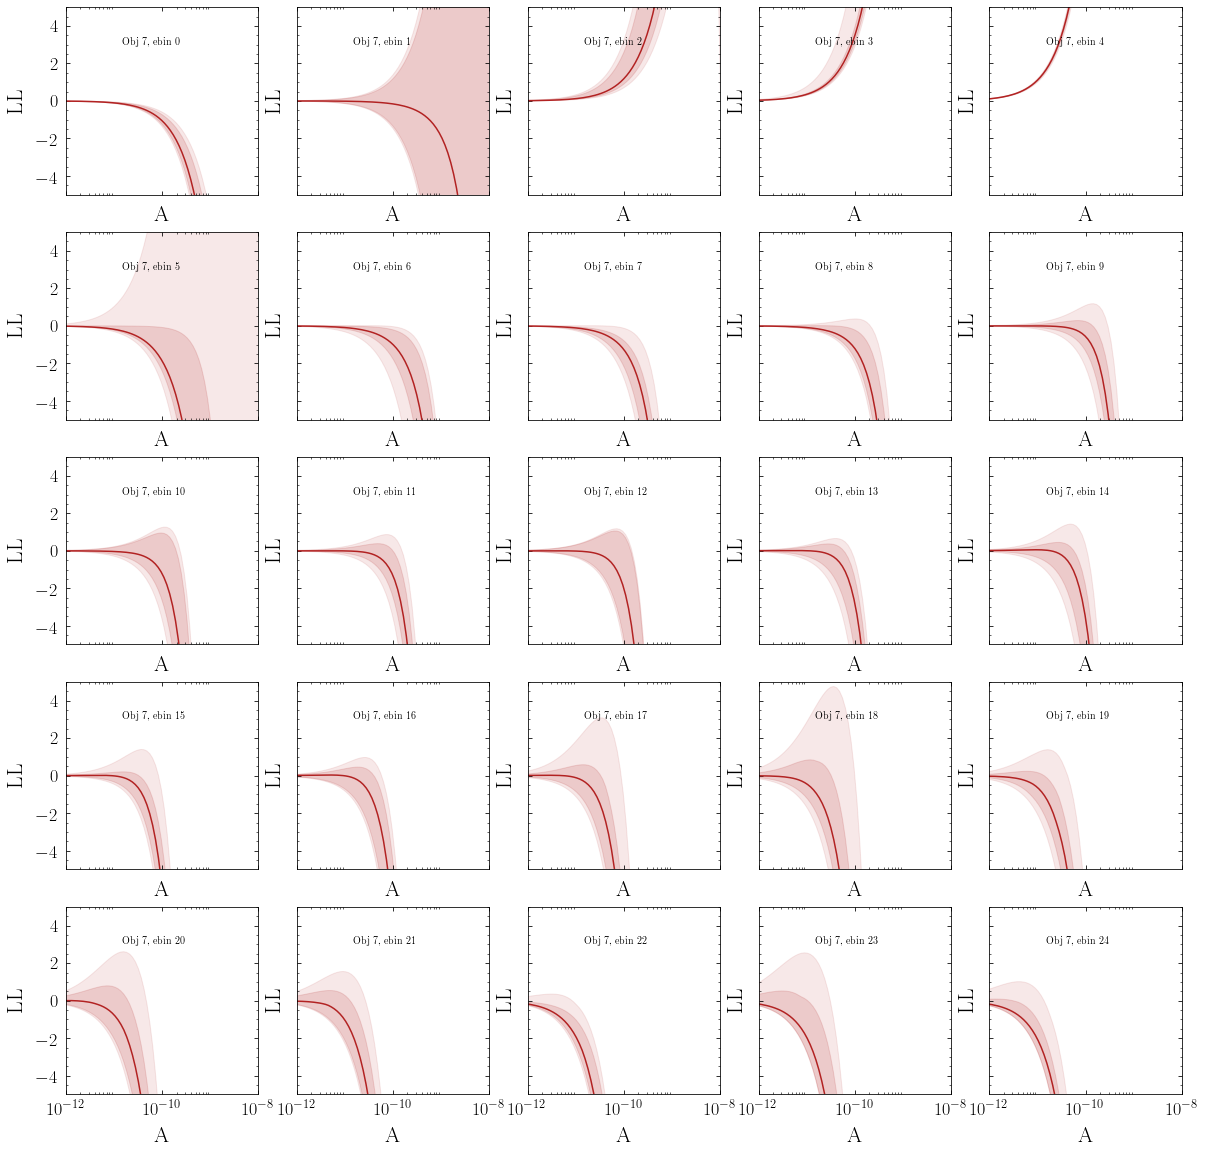

In [84]:
ncols=5
nrows=5
nmc = 20

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

iobj = 7

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iebin = i*ncols + j
        LL2 = np.zeros((nmc, 200))
        for imc in range(nmc):
            LL2[imc] = np.load("../data/FloatPS_indiv_floatDM_loc1_noDMless7//////////LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("../data/FloatPS_indiv_floatDM_loc1_noDMless7/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-12,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)

# Intensity LLs

5it [00:00, 10.44it/s]


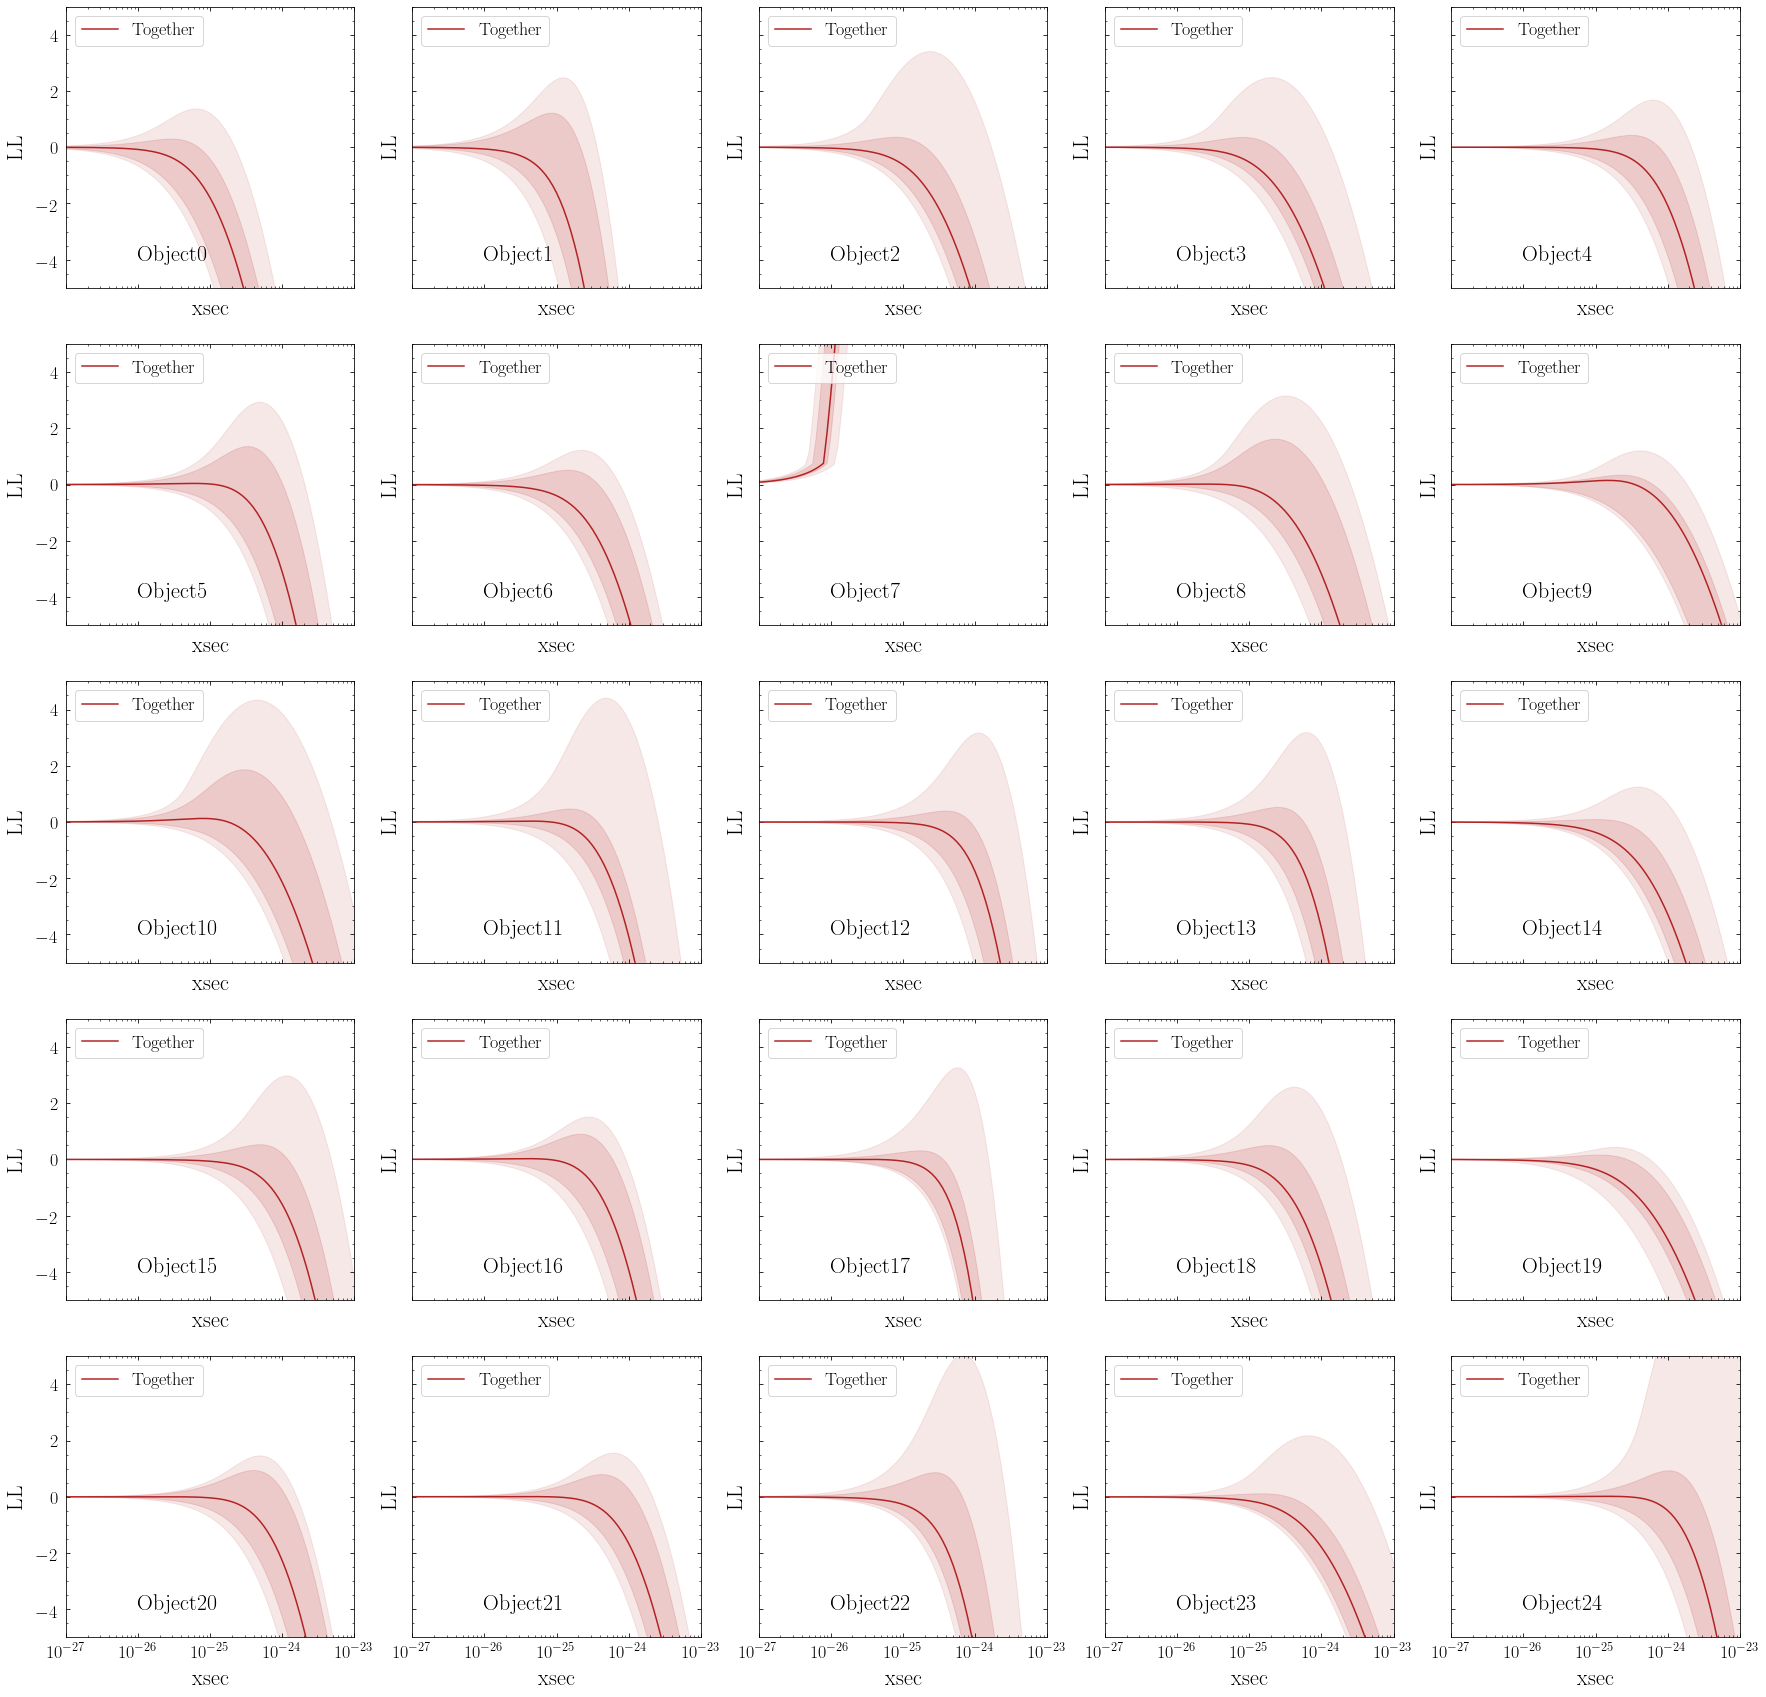

In [85]:
nobj=25
nmc = 20
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = np.load("../data/FloatPS_indiv_floatDM_loc1_noDMless7////LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2[iobj,imc] -= LL2[iobj,imc,0]


ncols=5
nrows=5

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.,30/1.))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='Together')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("xsec")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-27,1e-23)
        cell.set_ylim(-5,5)
        cell.text(1e-26,-4,"Object" + str(iobj), fontsize=22)
fig.savefig("Compare.pdf")